## 002 Test multiple observed variables PyMC

Date: 20.Jul.2022

### Purpose

Test how effective PyMC is for sampling when there are multiple observed variables.

### Outline of Plan

1. Create two sample distributions from scipy.stats.norm.rvs centered at different values
2. Create a PyMC model with two observed variables
3. Test sample speed

### What we did in this notebook

1. Sample of 100/1000 from norm.rvs
2. Created PyMC models with two observed vectors
3. Tested time of sampling


In [1]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

import pymc as pm
import arviz as az
import numpy as np

/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

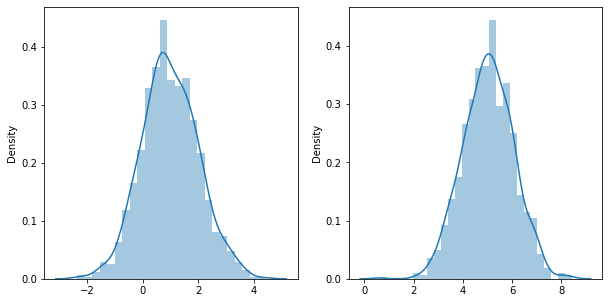

In [2]:
true_a = 1.0
true_b = 5.0
sigma = 1.0
sample_size = 1000
a_sample = norm.rvs(loc=true_a, scale=sigma, size=sample_size)
b_sample = norm.rvs(loc=true_b, scale=sigma, size=sample_size)

fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
sns.distplot(a_sample, ax=ax[0], label='a')
sns.distplot(b_sample, ax=ax[1], label='b')

## Time the sampling for observed variables

In [17]:
%%time
with pm.Model() as model:
    x = pm.Normal('x', mu=0, sigma=1)
    a_est = pm.Normal('a_est', mu=x, sigma=1, observed=a_sample)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


CPU times: user 2.92 s, sys: 276 ms, total: 3.2 s
Wall time: 22.8 s


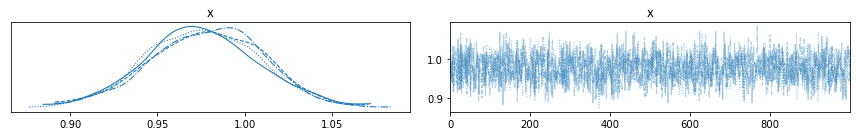

In [18]:
az.plot_trace(trace)
plt.tight_layout()

## Time the sampling for two observed variables

In [19]:
%%time
with pm.Model() as model:
    x = pm.Normal('x', mu=0, sigma=1)
    y = pm.Normal('y', mu=0, sigma=1)
    a_est = pm.Normal('a_est', mu=x, sigma=1, observed=a_sample)
    b_est = pm.Normal('b_est', mu=y, sigma=1, observed=b_sample)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, y]


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


CPU times: user 3.78 s, sys: 277 ms, total: 4.05 s
Wall time: 23 s


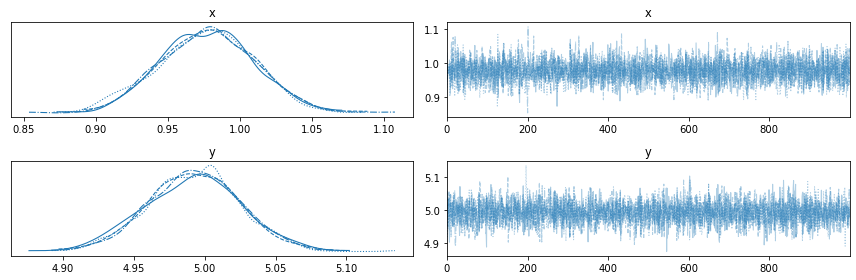

In [20]:
az.plot_trace(trace)
plt.tight_layout()

In [21]:
np.mean(a_sample)

0.9785549415067204

In [22]:
np.mean(b_sample)

4.997220748268226